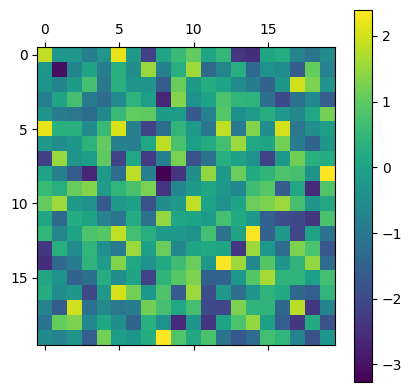

In [116]:
import numpy as np
import matplotlib.pyplot as plt

mat_size = 20
# elems drawn from normal dist
rand_mat = np.random.randn(mat_size, mat_size)
# symmetrize the matrix
ham = (rand_mat + rand_mat.T) / np.sqrt(2)
plt.matshow(ham)
plt.colorbar()

In [105]:
class Krylov:
    def __init__(self, subspace_size: int, ham: np.ndarray, psi: np.ndarray):
        self._subspace_size = subspace_size
        self._ham = ham
        self._psi = psi

    @property
    def subspace_size(self) -> int:
        return self._subspace_size

    @property
    def ham(self) -> np.ndarray:
        return self._ham

    @property
    def psi(self) -> np.ndarray:
        return self._psi

    def gen_krylov_subspace(self) -> np.ndarray:
        return np.array(
            [
                np.linalg.matrix_power(self.ham, n) @ self.psi
                for n in range(self.subspace_size)
            ]
        ).T

    def subspace_projector(self) -> np.ndarray:
        q, _ = np.linalg.qr(self.gen_krylov_subspace())
        return q

In [117]:
psi = np.random.randn(mat_size)
psi /= np.linalg.norm(psi)

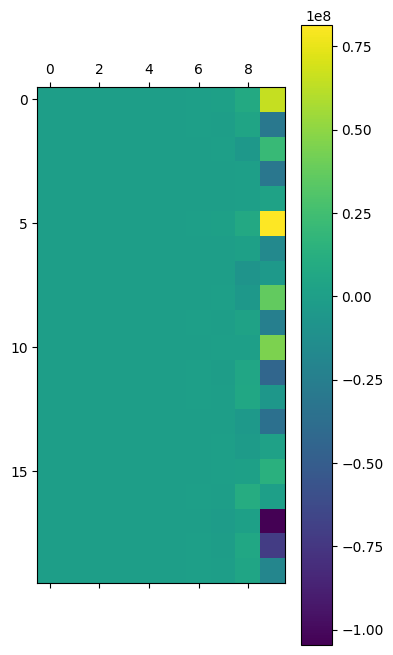

In [118]:
krylov = Krylov(subspace_size=10, ham=ham, psi=np.random.randn(mat_size))
span = krylov.gen_krylov_subspace()
plt.matshow(span)
plt.colorbar()

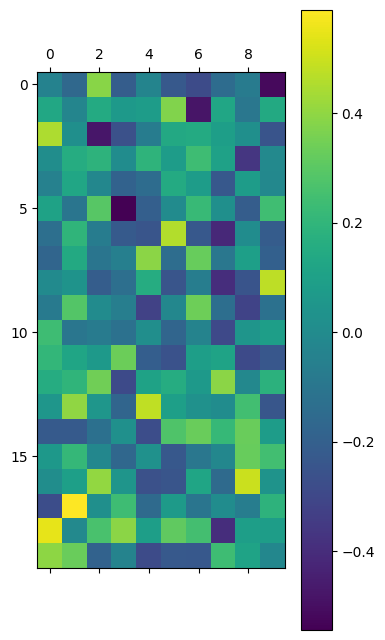

In [119]:
q = krylov.subspace_projector()
plt.matshow(q)
plt.colorbar()

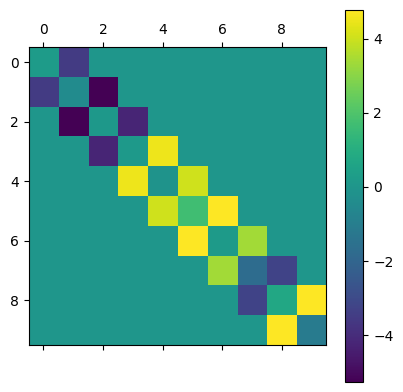

In [120]:
plt.matshow(q.T @ ham @ q)
plt.colorbar()

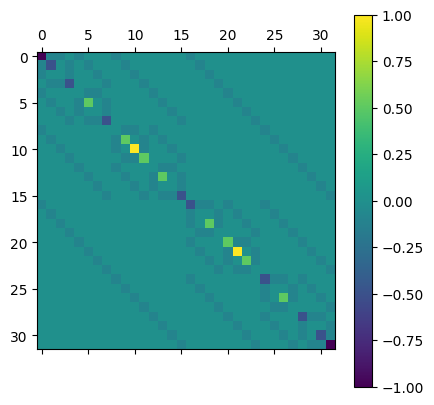

In [113]:
from tnpy.model.transverse_ising import TransverseIsing
from tnpy.operators import FullHamiltonian

model = TransverseIsing(n=5, j=1, h=0.1)
ham = FullHamiltonian(model.mpo).matrix

plt.matshow(ham)
plt.colorbar()

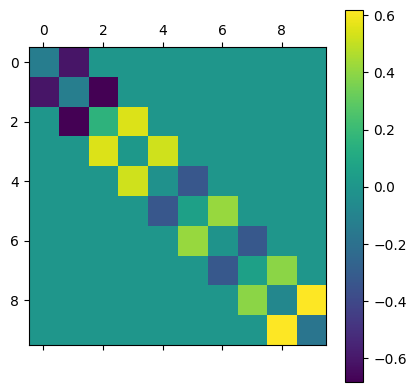

In [115]:
psi = np.random.randn(len(ham))
psi /= np.linalg.norm(psi)

krylov = Krylov(subspace_size=10, ham=ham, psi=psi)
q = krylov.subspace_projector()
plt.matshow(q.T @ ham @ q)
plt.colorbar()